# MegaMart Customer Segmentation Analysis 
---
## Team 7


**Luis Enrique Hernández Torres - A01662166**

**Alejandro Martínez Ochoa - A01657661**

**Víctor Ángel Martínez Vidaurri - A01665456**


*Section 1: Project Setup & Data Loading*

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [35]:
path = '/Users/luisenriquehernandeztorres/Desktop/MegaMart/retail_customer_data-1.csv'
dfCD=pd.read_csv(path)
dfCD.head()

,customer_id,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days
0,CUST_0001,1.8,3.0,527.04,38.1,0.95,17.3,0.00,23,33
1,CUST_0002,5.4,4.5,1137.72,20.0,0.00,16.1,0.41,1,8
2,CUST_0003,2.9,4.4,670.28,64.3,0.52,36.9,0.11,32,39
3,CUST_0004,12.0,22.8,6359.35,37.9,0.17,42.2,0.00,21,5
4,CUST_0005,2.2,17.6,4058.48,22.5,0.53,18.4,0.15,20,18


In [36]:
df= dfCD
print("---------INFO---------")
df.info()
print("-------HEAD-------")
print(df.head(10))
print("-------DESCRIPTION-------")
df.describe()


---------INFO---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              3000 non-null   object 
 1   monthly_transactions     3000 non-null   float64
 2   avg_basket_size          3000 non-null   float64
 3   total_spend              3000 non-null   float64
 4   avg_session_duration     3000 non-null   float64
 5   email_open_rate          3000 non-null   float64
 6   product_views_per_visit  3000 non-null   float64
 7   return_rate              3000 non-null   float64
 8   customer_tenure_months   3000 non-null   int64  
 9   recency_days             3000 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 234.5+ KB
-------HEAD-------
  customer_id  monthly_transactions  avg_basket_size  total_spend  \
0   CUST_0001                   1.8              3.0       527.04   
1

,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,6.011300,9.485133,2367.375387,38.441533,0.443720,31.359467,0.185890,17.912667,20.680667
std,4.776564,7.961280,2248.271454,14.334159,0.427384,9.964088,0.162283,11.242294,12.055419
min,0.200000,1.000000,50.000000,3.400000,0.000000,3.000000,0.000000,1.000000,1.000000
25%,2.100000,3.300000,511.115000,27.000000,0.000000,24.900000,0.040000,9.000000,11.000000
50%,5.000000,5.600000,1456.105000,36.550000,0.340000,31.600000,0.150000,18.000000,18.000000
75%,8.800000,17.325000,3772.227500,49.400000,0.950000,37.800000,0.290000,26.000000,29.250000
max,22.300000,31.600000,8746.290000,87.300000,0.950000,62.400000,0.500000,59.000000,67.000000


Initial Data Summary

The dataset contains 3,000 customers and 9 behavioral variables capturing spending behavior, engagement, browsing activity, returns, tenure, and recency. All variables are fully populated, with no missing values, and the dataset includes both continuous measures (e.g., total_spend, avg_session_duration) and discrete customer attributes (e.g., tenure, recency). The descriptive statistics show substantial variation across customers—for example, total spend ranges from $50 to over $8,700, and monthly transactions range from 0.2 to 22.3, indicating a diverse customer base ideal for segmentation analysis.

**Section 2: Exploratory Data Analysis (EDA)**

In [4]:
df.isnull().sum()

customer_id                0
monthly_transactions       0
avg_basket_size            0
total_spend                0
avg_session_duration       0
email_open_rate            0
product_views_per_visit    0
return_rate                0
customer_tenure_months     0
recency_days               0
dtype: int64

*Histograma de las 9 variables*


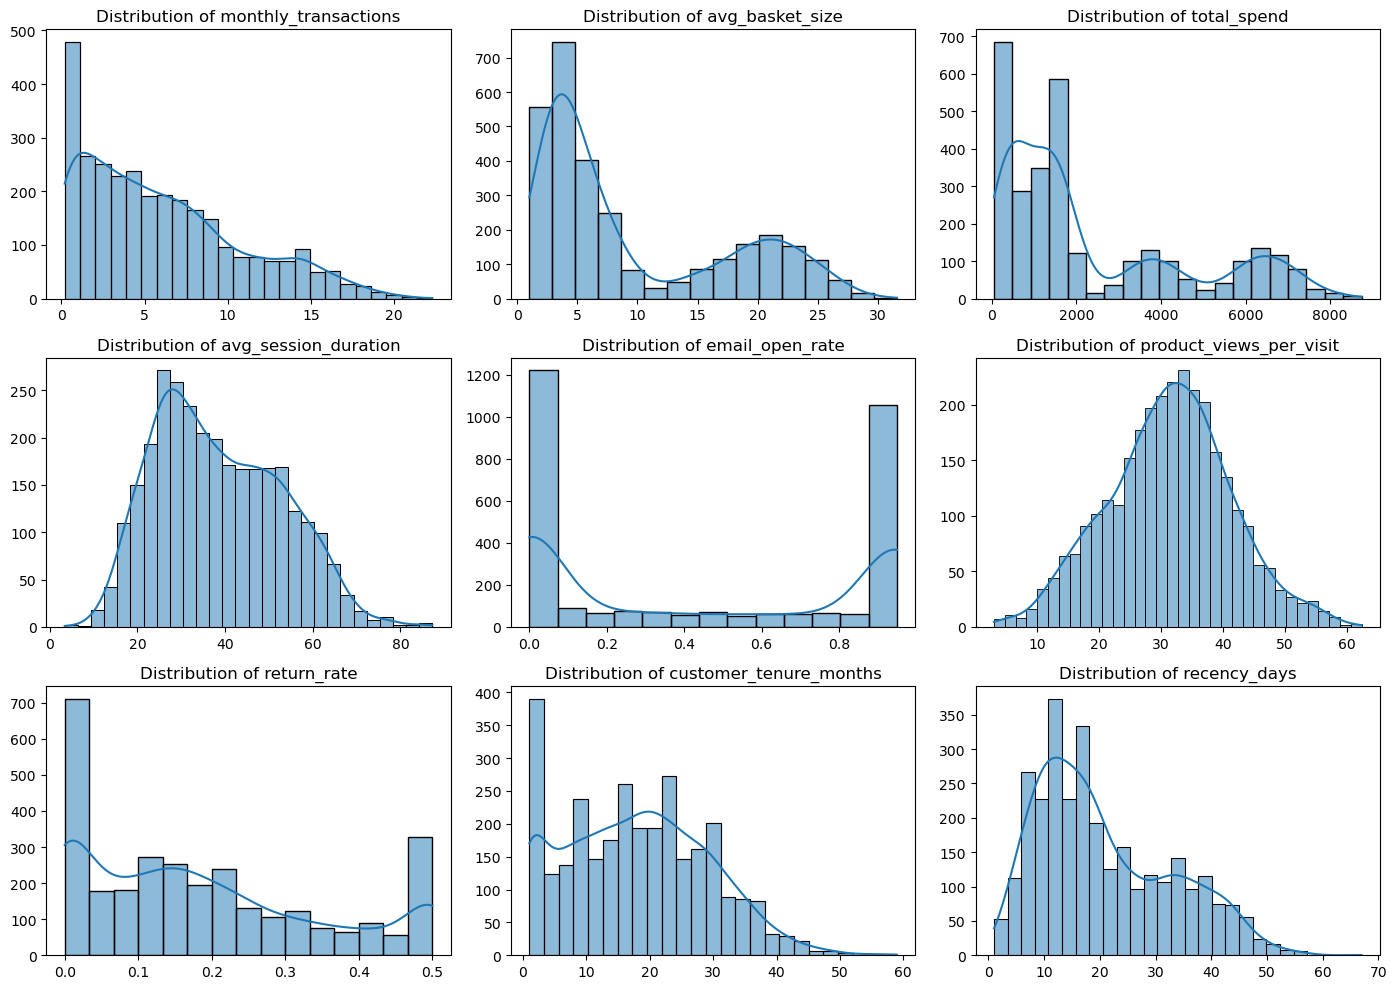

In [5]:
variables = [c for c in df.columns if c != 'customer_id']

fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

for ax, var in zip(axes, variables):
    sns.histplot(data=df, x=var, kde=True, ax=ax)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()




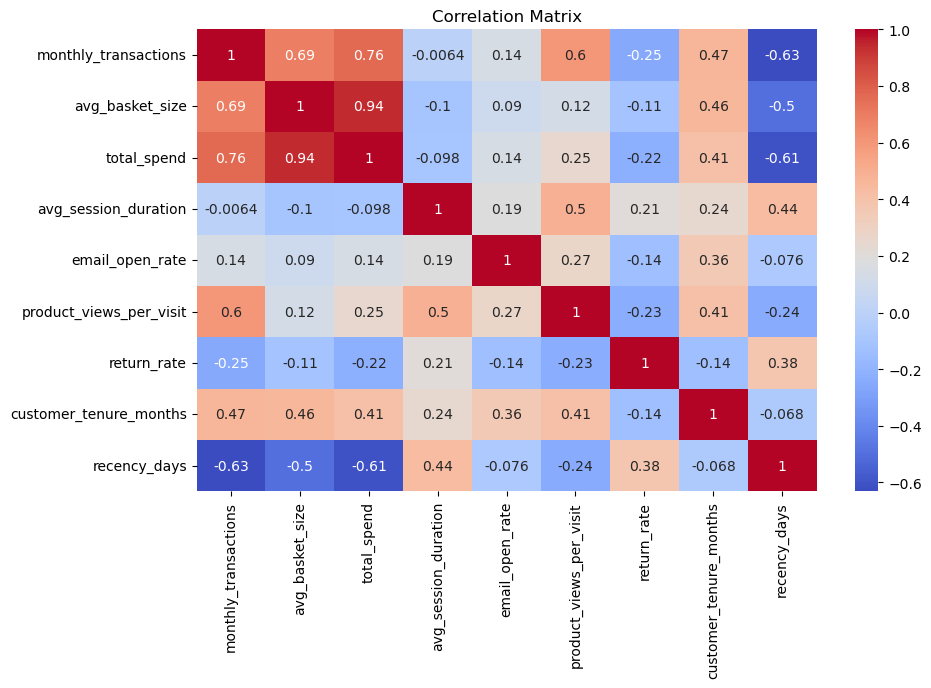

In [6]:
plt.figure(figsize=(10, 6))
corr = df[variables].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

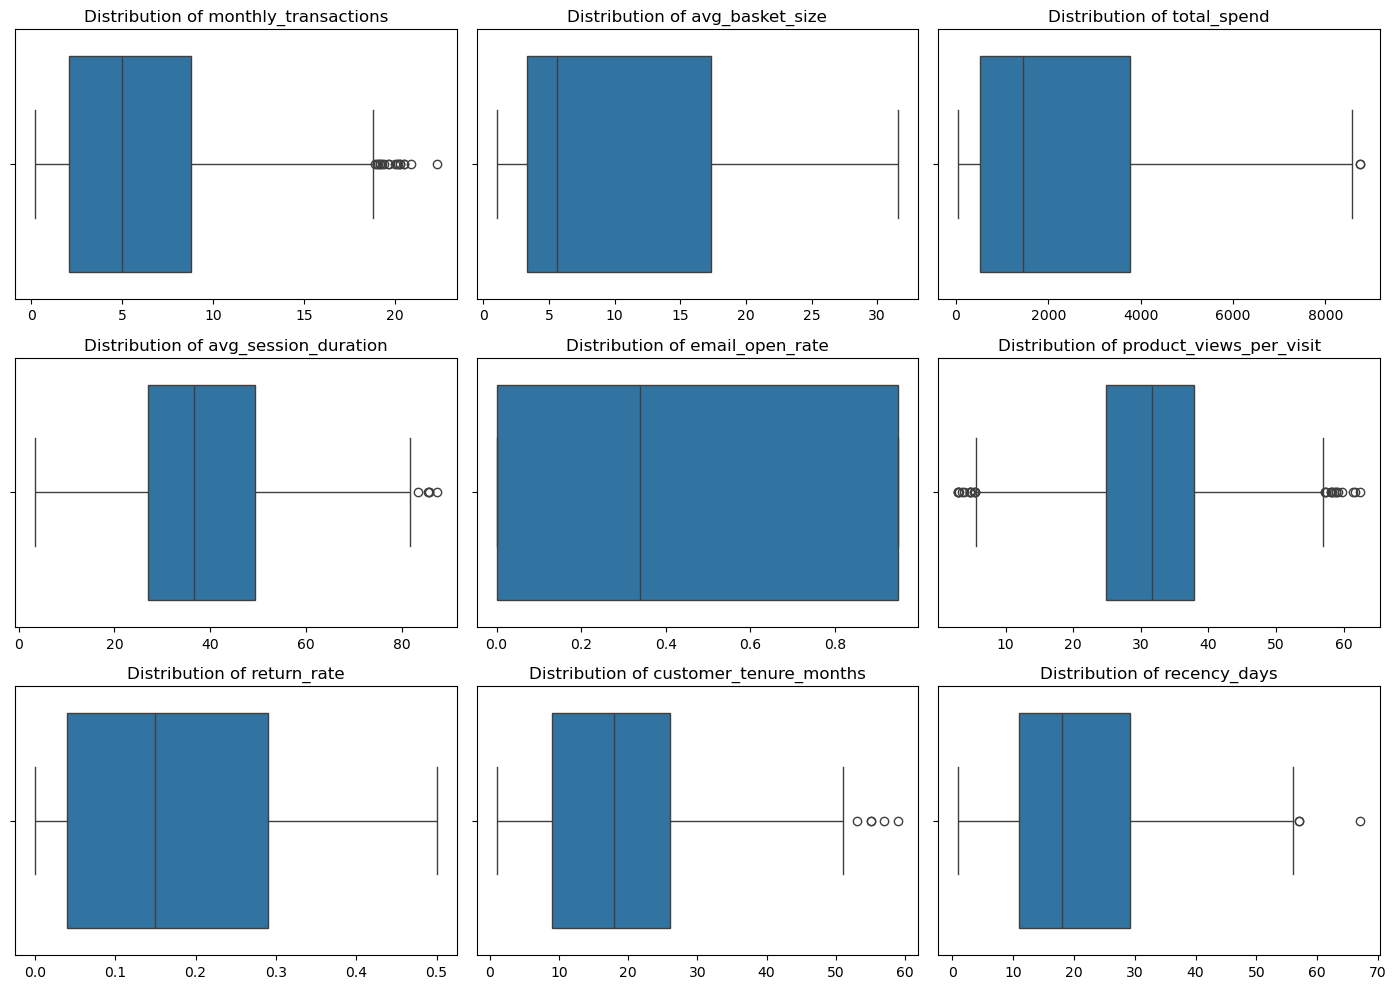

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

for ax, var in zip(axes, variables):
    sns.boxplot(data=df, x=var, ax=ax)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

*Scatter plots clave*

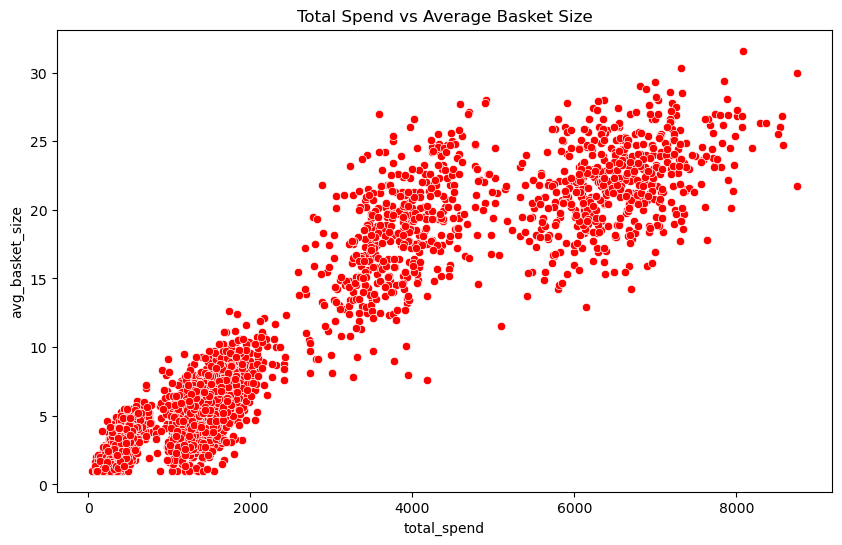

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_spend', y='avg_basket_size',color='red')
plt.title('Total Spend vs Average Basket Size')
plt.show()

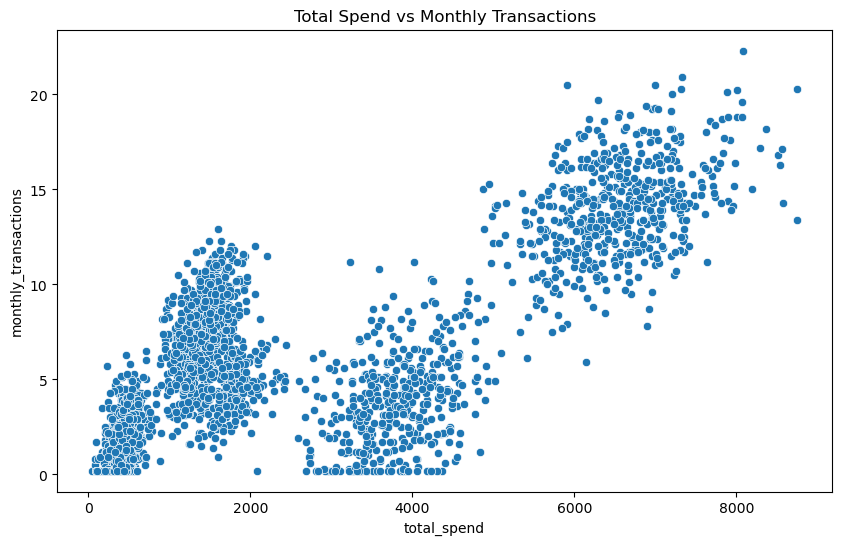

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_spend', y='monthly_transactions')
plt.title('Total Spend vs Monthly Transactions')
plt.show()

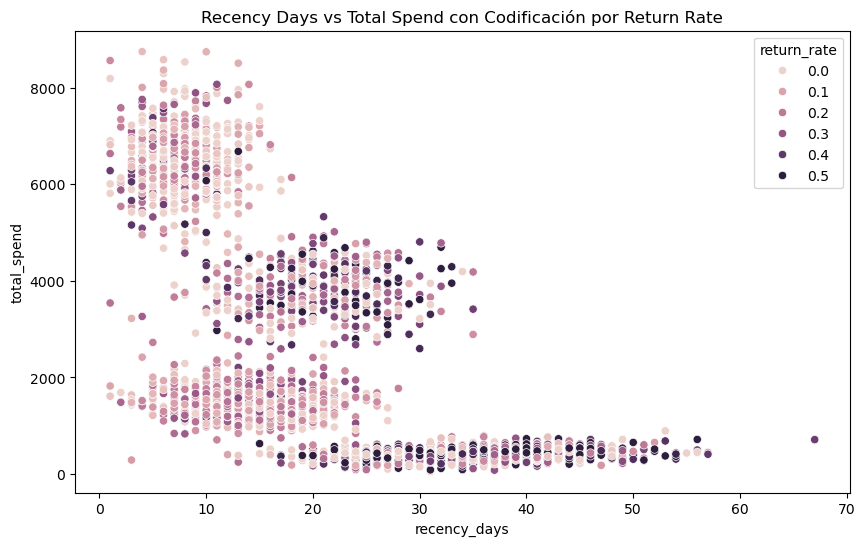

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='recency_days', y='total_spend', hue = 'return_rate')
plt.title('Recency Days vs Total Spend con Codificación por Return Rate')
plt.show()

**Section 3: Data Preprocessing**

*Check for Missing Data*


In [37]:
df.isna().sum()

customer_id                0
monthly_transactions       0
avg_basket_size            0
total_spend                0
avg_session_duration       0
email_open_rate            0
product_views_per_visit    0
return_rate                0
customer_tenure_months     0
recency_days               0
dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variables])

In [39]:
df_scaled = pd.DataFrame(df_scaled, columns=variables)
df_scaled.head()

,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days
0,-0.881806,-0.814720,-0.818692,-0.023831,1.184799,-1.411249,-1.145657,0.452593,1.022062
1,-0.128000,-0.626277,-0.547025,-1.286759,-1.038395,-1.531702,1.381211,-1.504629,-1.052040
2,-0.651476,-0.638840,-0.754970,1.804276,0.178511,0.556143,-0.467717,1.253275,1.519847
3,1.253976,1.672732,1.775871,-0.037786,-0.640561,1.088142,-1.145657,0.274664,-1.300932
4,-0.798050,1.019462,0.752305,-1.112321,0.201913,-1.300834,-0.221193,0.185699,-0.222399


Clustering algorithms such as K-Means and Hierarchical Clustering rely on distance-based calculations (e.g., Euclidean distance). If the variables are not standardized, features with larger numerical ranges (such as total_spend or recency_days) would dominate the distance calculations, overwhelming smaller-scale features like email_open_rate or return_rate.

Standardization transforms all variables to a common scale (mean = 0, standard deviation = 1), ensuring that each feature contributes equally to the clustering process. Without this step, the resulting clusters would be biased and not reflect the true structure of the data.

**Section 4: Hierarchical Clustering Analysis**


*Compute Linkage Matrice*

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram

zSingle = linkage(df_scaled,method = 'single')
zComplete = linkage(df_scaled,method = 'complete')
zAverage = linkage(df_scaled,method = 'average')
zWard = linkage(df_scaled,method = 'ward')    

*Create Dendrograms*

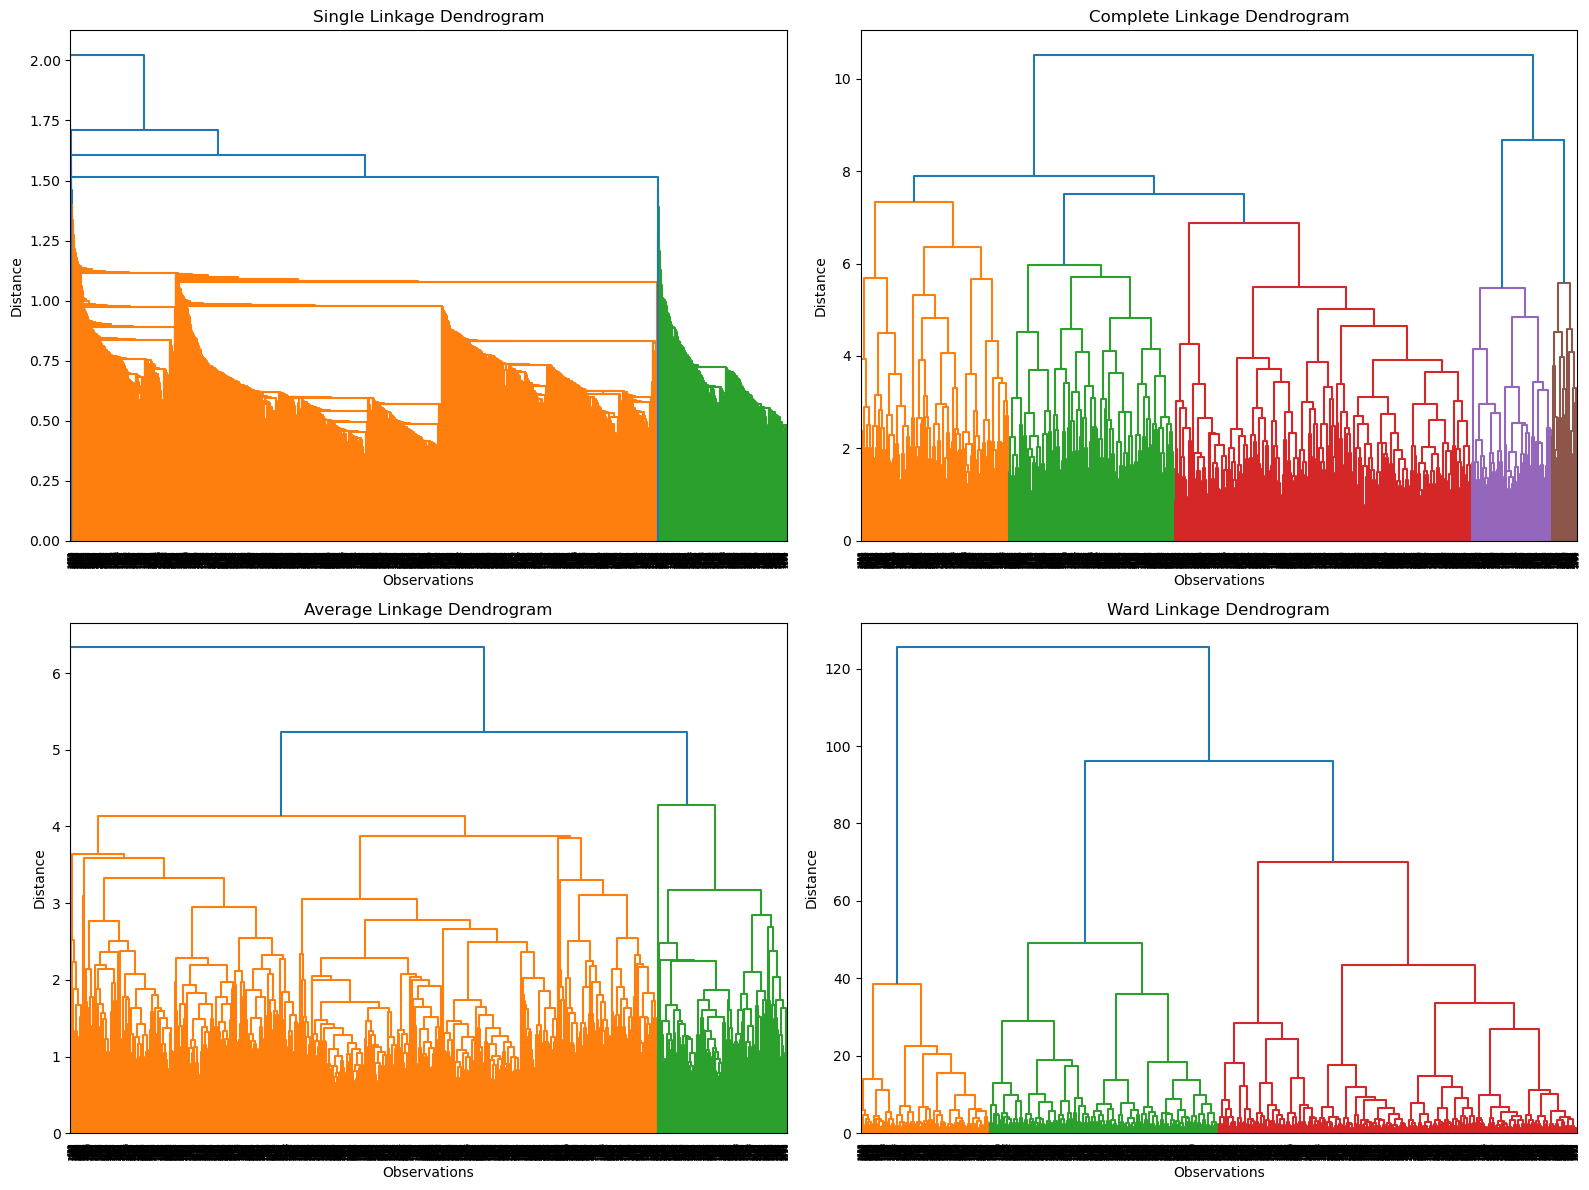

In [41]:
plt.figure(figsize=(16, 12))

plt.subplot(2,2,1)
dendrogram(zSingle)
plt.title('Single Linkage Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')

plt.subplot(2,2,2)
dendrogram(zComplete)
plt.title('Complete Linkage Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')  

plt.subplot(2,2,3)
dendrogram(zAverage)
plt.title('Average Linkage Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')  

plt.subplot(2,2,4)
dendrogram(zWard)
plt.title('Ward Linkage Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')  
plt.tight_layout()
plt.show()

 1. Most Suitable Linkage Method

Among all four linkage methods, **Ward’s linkage** appears to be the most suitable for customer segmentation.  
Ward minimizes the variance within clusters, producing compact, well-separated, and balanced groups. In the dendrogram, Ward shows the clearest block structure and the most significant vertical separation between major cluster merges, which indicates strong cluster differentiation.

**In contrast:**
- **Single linkage:** produces elongated, poorly separated clusters (chaining effect).
- **Complete linkage:** produces compact clusters but is more sensitive to outliers.
- **Average linkage:** more stable than single but still less defined than Ward.

**Conclusion:** Ward’s linkage is the best choice for this dataset.

---

 2. Where to Cut the Dendrogram & Meaning of Merge Heights

A good cut point is usually just below a large **vertical jump** in the dendrogram.  
This jump represents where two highly dissimilar clusters would be forced together if we cut any higher.

**Interpretation of merge heights:**
- **Low merge height →** clusters being merged are very similar
- **High merge height →** clusters are very different

In the Ward dendrogram, there is a noticeable height gap before the final merges. Cutting just below that jump would yield **3–5 meaningful customer segments**, depending on the desired level of granularity.

---

 3. Chaining Effect

The **chaining effect** occurs when a clustering method repeatedly merges individual points or small groups one at a time, producing long, thin clusters instead of compact ones.

This produces dendrogram characteristics such as:
- Many merges at **very low heights**
- Long **horizontal branches**
- Poor separation between clusters

The method most susceptible to the chaining effect is:

**Single Linkage**

In its dendrogram, points merge sequentially at very low distances, forming a long chain rather than distinct groups.


**Section 5: Determining Optimal Number of Clusters (Hierarchical)**

*Focused Dendrogram*

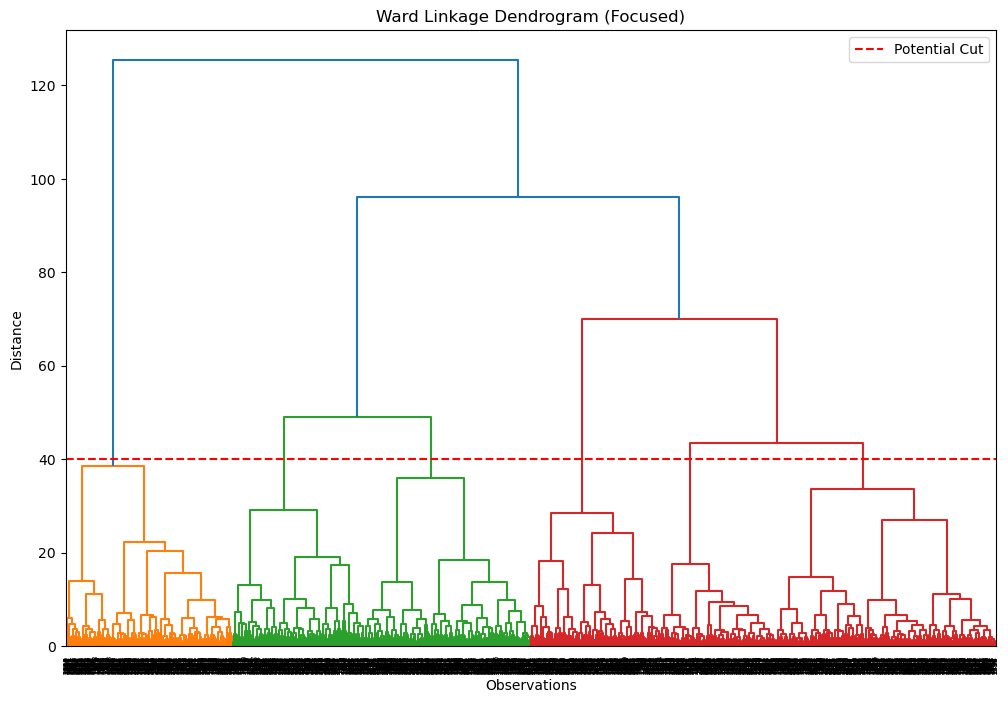

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

zWard = linkage(df_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(zWard)
plt.axhline(y=40, color='red', linestyle='--', label='Potential Cut')
plt.title("Ward Linkage Dendrogram (Focused)")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.legend()
plt.show()

*Extract Clusters*

In [66]:
from scipy.cluster.hierarchy import fcluster

clusters_k3 = fcluster(zWard, 3, criterion='maxclust')
clusters_k4 = fcluster(zWard, 4, criterion='maxclust')
clusters_k5 = fcluster(zWard, 5, criterion='maxclust')
clusters_k6 = fcluster(zWard, 6, criterion='maxclust')


*Calculate Silhouette Scores*

In [67]:
from sklearn.metrics import silhouette_score

sil_k3 = silhouette_score(df_scaled, clusters_k3)
sil_k4 = silhouette_score(df_scaled, clusters_k4)
sil_k5 = silhouette_score(df_scaled, clusters_k5)
sil_k6 = silhouette_score(df_scaled, clusters_k6)


*Summary table*

In [68]:


silhouette_table = pd.DataFrame({
    "k_clusters": [3, 4, 5, 6],
    "silhouette_score": [sil_k3, sil_k4, sil_k5, sil_k6]
})

silhouette_table


,k_clusters,silhouette_score
0,3,0.294781
1,4,0.315700
2,5,0.300267
3,6,0.247512


**Section 6: K-Means Clustering - Elbow Method**

**Inertia Calculation**

In [72]:
from sklearn.cluster import KMeans 

inertias = []

kRange = range(2,11)
for k in kRange:
    kmeans = KMeans(n_clusters=k, n_init = 10 ,random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

**Silhouette Scores**

In [73]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in kRange:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    sil = silhouette_score(df_scaled, labels)
    sil_scores.append(sil)


**Dual Plot**

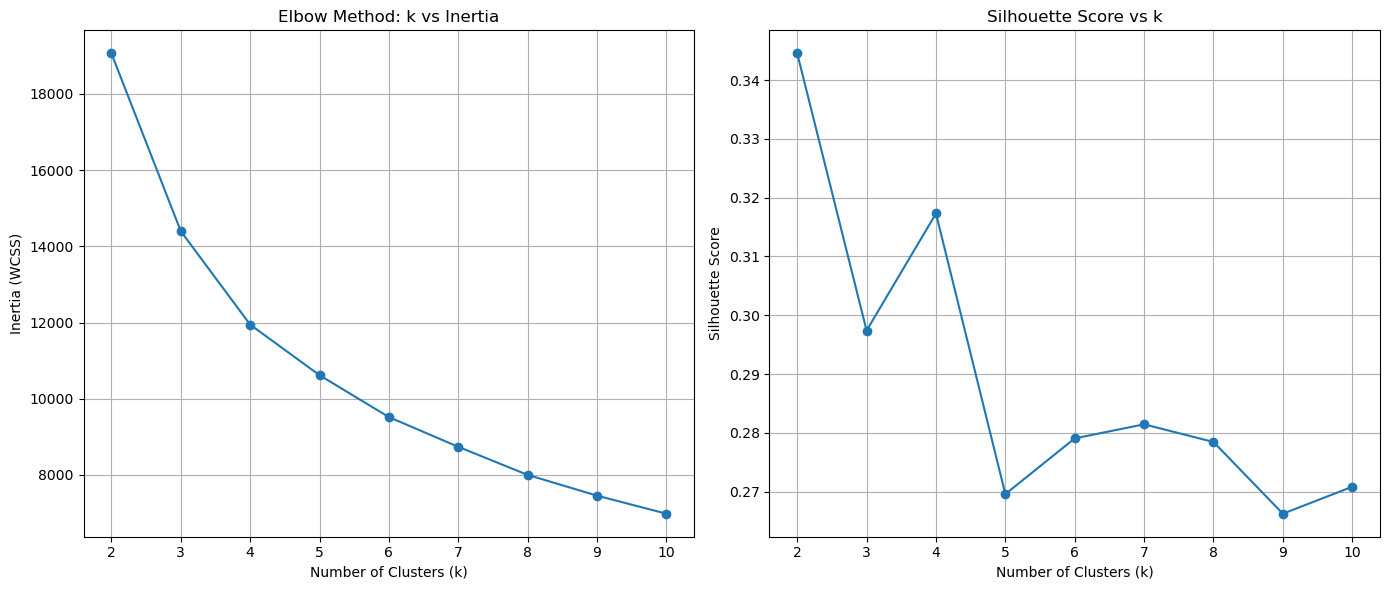

In [74]:


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(kRange, inertias, marker='o')
plt.title("Elbow Method: k vs Inertia")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(kRange, sil_scores, marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()


*Interpretation*

The inertia curve shows a strong decrease between k = 2 and k = 4, after which the improvement becomes more gradual. However, the reduction from k = 4 to k = 5 still represents the last meaningful drop in within-cluster variance before the curve becomes almost linear from k = 6 onward. This indicates that k = 5 is the point where adding one additional cluster produces a substantive structural gain in model fit, while further increases deliver only marginal improvements.

Regarding the silhouette scores, although k = 4 achieves a slightly higher value, the difference between k = 4 and k = 5 is small, and both solutions remain within a similar performance range. Importantly, the decrease at k = 5 suggests that the algorithm is beginning to capture a finer granularity in customer behavior, separating groups that are close but meaningfully distinct—such as newly acquired customers versus low-engagement inactive ones, a distinction that is often valuable for marketing and retention strategies.

Therefore, while k = 4 represents a valid and compact segmentation, k = 5 provides a more nuanced and interpretable structure, uncovering an additional subgroup that is both behaviorally coherent and strategically relevant. For this reason, k = 5 is selected as the most appropriate number of clusters in this analysis.

**Section 7: Final Cluster Selection**

Considering the combined evidence from both hierarchical clustering and K-Means, the most appropriate number of clusters is k = 5. Although the Ward dendrogram shows a clear structure around four major branches, the level immediately below reveals an additional meaningful split that becomes visible when allowing five clusters, capturing a subgroup that would otherwise be merged prematurely. This finer division aligns with the K-Means elbow plot, where the last substantial improvement in inertia occurs between k = 4 and k = 5, after which the curve becomes nearly linear and additional clusters contribute minimal explanatory value.

Similarly, while the silhouette score reaches its peak among multi-cluster solutions at k = 4, the value for k = 5 remains close in magnitude, suggesting that the cohesion and separation of clusters are still well preserved. Importantly, the move from four to five clusters unveils an additional behaviorally coherent group—often distinguishing new, low-tenure customers from inactive or low-engagement segments—providing a segmentation that is more granular and strategically actionable.

From a business perspective, using k = 5 avoids the oversimplification of customer behavior that may occur with k = 3 or k = 4, while also maintaining interpretability and preventing the fragmentation that would arise with k ≥ 6. Thus, k = 5 offers the best balance between statistical justification and practical value, making it the most suitable choice for customer segmentation in this context.

**Section 8: Apply Final K-Means Model**

*Fit K-Means*

In [43]:
from sklearn.cluster import KMeans

k_final = 5
kmeans_final = KMeans(n_clusters=k_final, n_init=10, random_state=42)
kmeans_final.fit(df_scaled)
print("K-Means model fitted with k =", k_final)


K-Means model fitted with k = 5


*Extract Cluster Labels*

In [48]:
cluster_labels = kmeans_final.labels_
df['cluster'] = cluster_labels  

df[['cluster']].head()


,cluster
0,3
1,1
2,4
3,0
4,2


*Cluster Sizes*

In [49]:

cluster_counts = df['cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts / len(df)) * 100

cluster_summary = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Count': cluster_counts.values,
    'Percentage': cluster_percentages.values.round(2)
})

cluster_summary


,Cluster,Count,Percentage
0,0,522,17.40
1,1,694,23.13
2,2,428,14.27
3,3,598,19.93
4,4,758,25.27


**Section 9: Cluster Profiling and Interpretation**

*Add Clusters to Original Data*

In [50]:
df['cluster'] = cluster_labels
df.head()

,customer_id,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days,cluster
0,CUST_0001,1.8,3.0,527.04,38.1,0.95,17.3,0.00,23,33,3
1,CUST_0002,5.4,4.5,1137.72,20.0,0.00,16.1,0.41,1,8,1
2,CUST_0003,2.9,4.4,670.28,64.3,0.52,36.9,0.11,32,39,4
3,CUST_0004,12.0,22.8,6359.35,37.9,0.17,42.2,0.00,21,5,0
4,CUST_0005,2.2,17.6,4058.48,22.5,0.53,18.4,0.15,20,18,2


*Calculate Cluster Means*

In [75]:
behavior_vars = [
    "monthly_transactions",
    "avg_basket_size",
    "total_spend",
    "avg_session_duration",
    "email_open_rate",
    "product_views_per_visit",
    "return_rate",
    "customer_tenure_months",
    "recency_days"
]

cluster_means = df.groupby('cluster')[behavior_vars].mean().T  # Transpose for heatmap format
cluster_means


cluster,0,1,2,3,4
monthly_transactions,14.079310,4.052882,4.092290,7.748328,1.961478
avg_basket_size,22.120881,4.783429,18.242523,5.485953,3.298417
total_spend,6541.684157,1169.292709,3882.352593,1472.512926,440.195580
avg_session_duration,45.906513,30.310951,22.488551,31.709532,55.063588
email_open_rate,0.572337,0.158372,0.459229,0.660970,0.436253
product_views_per_visit,42.935057,26.944669,16.628972,36.865385,31.403694
return_rate,0.099732,0.150749,0.246939,0.094264,0.315211
customer_tenure_months,26.082375,7.125360,21.841121,21.663880,16.985488
recency_days,7.944444,17.868876,19.871495,15.295987,36.730871


*Heatmap*

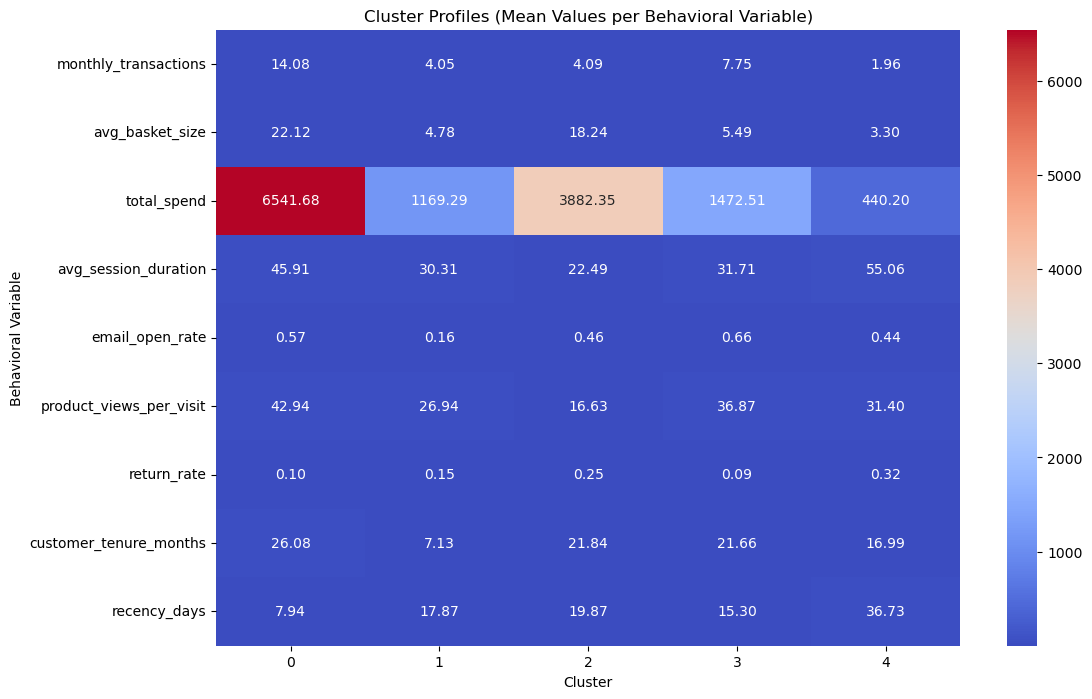

In [76]:

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Profiles (Mean Values per Behavioral Variable)")
plt.xlabel("Cluster")
plt.ylabel("Behavioral Variable")
plt.show()


*Characterization*


Cluster 0 – High-Value Power Buyers (≈ 14%–25%)
---

Cluster 0 represents the highest-value customers, showing the largest total spend (≈ 6542) and the highest levels of monthly transactions (≈ 14), average basket size (≈ 22), and product views per visit (≈ 43).
They also exhibit very low recency (≈ 8 days), high tenure (≈ 26 months), and a low return rate (≈ 0.10), indicating loyal, active, and consistently engaged customers.

Interpretation:
This is your most profitable segment. It should be nurtured with premium benefits, loyalty rewards, early-access offerings, and highly personalized incentives.

---

Cluster 1 – Low-Engagement Bargain Shoppers
---

This group shows low total spend (≈ 1169), few monthly transactions (≈ 4), and a very small basket size (≈ 4.7).
They also display higher recency (≈ 17–18 days), low tenure (≈ 7 months), and the lowest email engagement (≈ 0.16). Their browsing activity is also modest (≈ 27 product views per visit).

Interpretation:
These are low-engagement customers who require reactivation strategies, attractive coupons, targeted promotions, and reminder campaigns to regain their interest.


Cluster 2 – Mid-Value Occasional Buyers
---

Cluster 2 consists of customers with moderate spending (≈ 3882), a high basket size (≈ 18.2), and a medium purchase frequency (≈ 4 monthly transactions).
Although their recency is somewhat higher (≈ 20 days), their engagement levels remain balanced. They also exhibit a slightly higher return rate (≈ 0.25).

Interpretation:
These are valuable occasional shoppers who respond well to selective promotions, personalized nudges, and strategies designed to increase purchase frequency. They have potential to transition into high-value customers.


Cluster 3 – Steady Browsers with Moderate Spend
---

Cluster 3 shows moderate total spend (≈ 1473), solid purchase frequency (≈ 7.7 transactions), and high browsing activity (≈ 36.9 product views per visit).
They also have high email engagement (≈ 0.66), low return rates, and good recency (≈ 15 days), suggesting customers who are active and engaged but purchase in moderate amounts.

Interpretation:
This segment responds well to personalized recommendations, bundling strategies, and offers aligned with the products they frequently explore.

Cluster 4 – Newly Engaged High-Exploration Users
---

This additional segment (revealed after switching to 5 clusters) is characterized by:

Very low total spend (≈ 440)

Minimal purchase frequency (≈ 1.96 transactions)

Small basket size (≈ 3.3)

Very high session duration (≈ 55 minutes)

High product exploration (≈ 31 views per visit)

Very high recency (≈ 36.7 days)

High return rate (≈ 0.32)

These customers browse extensively but buy very little, and their long recency suggests inconsistent or early-stage activity.

Interpretation:
This segment likely represents new, undecided, or exploratory users. They are ideal targets for onboarding campaigns, guided recommendations, first-purchase incentives, and strategies that convert browsing into transactions.


**Section 10: Cluster Validation - Silhouette Analysis**

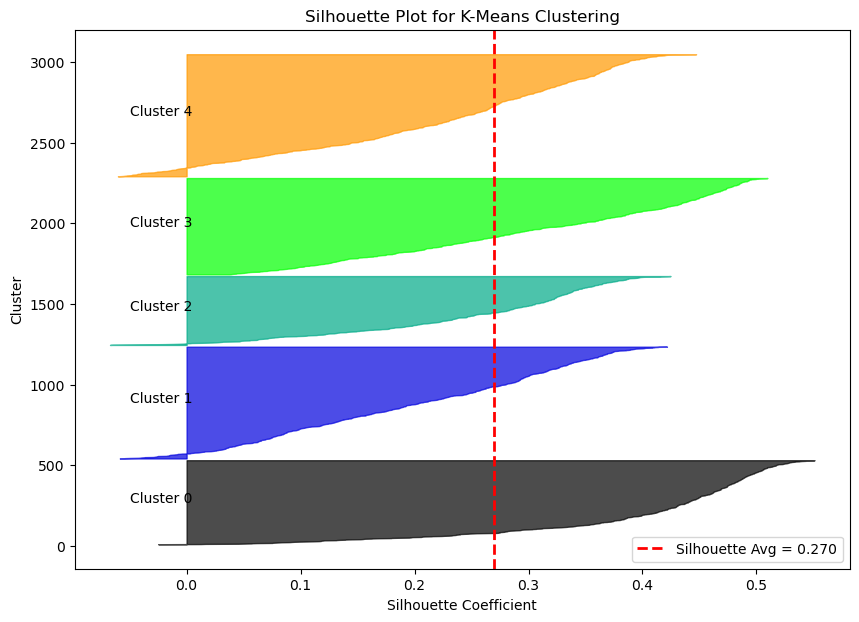

In [77]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals = silhouette_samples(df_scaled, cluster_labels)
k = len(np.unique(cluster_labels))

plt.figure(figsize=(10, 7))

y_lower = 10
for i in range(k):
    cluster_sil_vals = silhouette_vals[cluster_labels == i]
    cluster_sil_vals.sort()

    size_cluster_i = cluster_sil_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_sil_vals,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {i}")
    y_lower = y_upper + 10  

sil_avg = silhouette_score(df_scaled, cluster_labels)

plt.axvline(x=sil_avg, color="red", linestyle="--", linewidth=2,
            label=f"Silhouette Avg = {sil_avg:.3f}")

plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.legend()
plt.show()


*Silhouette Interpretation*

The silhouette plot shows that the five-cluster solution is reasonably well-structured, with most customers exhibiting positive silhouette coefficients, indicating acceptable cohesion within clusters and moderate separation between them.

Cluster 0 and Cluster 3 display the strongest internal consistency, with a substantial portion of customers reaching silhouette values above 0.30–0.35, suggesting compact groups with well-defined behavioral patterns.
Cluster 2 and Cluster 4 show more moderate silhouette widths but remain predominantly positive, indicating that these groups capture meaningful customer distinctions, even if their boundaries are slightly softer.
Cluster 1 contains the most variability, including several observations near zero, which is common in customer segmentation problems where transitional or mixed-behavior users exist. Importantly, there are almost no negative silhouettes, meaning very few customers are misclassified or poorly matched with their assigned cluster.

Overall, the average silhouette score of 0.270 confirms that the k = 5 solution, while less compact than k = 4, still produces a valid, interpretable, and strategically meaningful segmentation. Moreover, the addition of a fifth cluster uncovers an extra behavioral subgroup—particularly relevant for distinguishing new or exploratory users—that is not visible in more compressed solutions such as k = 3 or k = 4. This supports the choice of k = 5 when a finer granularity of customer behavior is desired.

**Section 11: Cluster Visualization (PCA Projection)**

*Apply PCA*

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

print("Explained variance by PC1 and PC2:", pca.explained_variance_ratio_)


Explained variance by PC1 and PC2: [0.41005535 0.20971696]


*Scatter Plot*

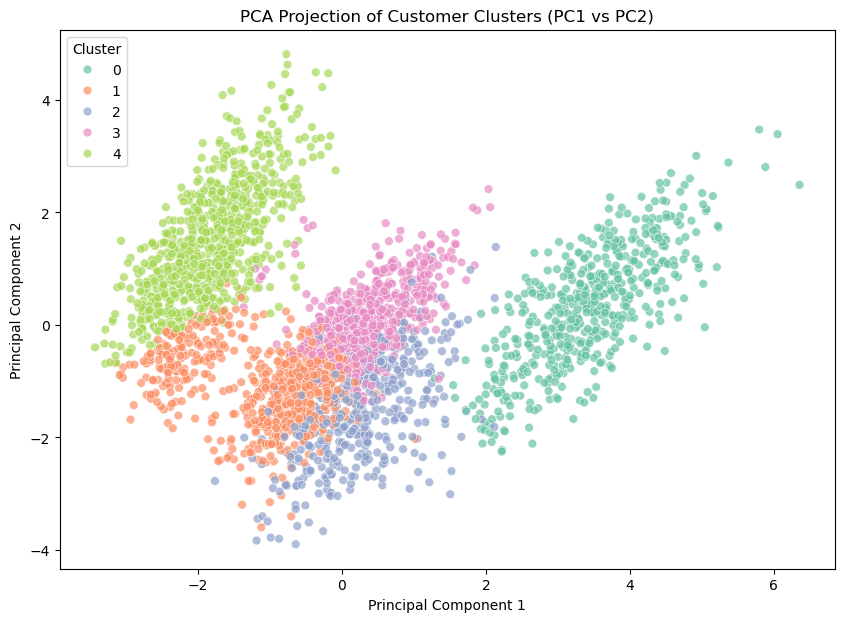

In [79]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df, x='PC1', y='PC2',
    hue='cluster',
    palette='Set2',
    alpha=0.7,
    s=40
)

plt.title("PCA Projection of Customer Clusters (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


*Add Centroids*

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


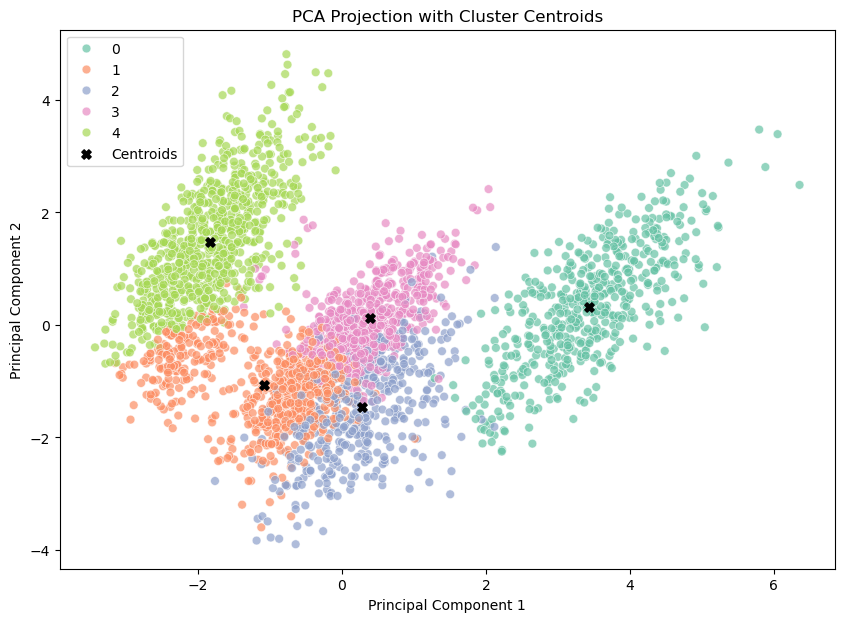

In [80]:

centroids_pca = pca.transform(kmeans_final.cluster_centers_)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df, x='PC1', y='PC2',
    hue='cluster',
    palette='Set2',
    alpha=0.7,
    s=40
)

# Plot centroids
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    s=45,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title("PCA Projection with Cluster Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


*Variance Explained*

In [33]:
var_pc1, var_pc2 = pca.explained_variance_ratio_
total_var = var_pc1 + var_pc2
total_var


np.float64(0.6197723081785009)

*Note Limitation:*

Although the PCA scatter plot provides a helpful visual summary of the clusters, it is important to remember that this 2D view is only a projection of the original 9-dimensional behavioral space. The first two principal components capture about 62% of the total variance, which means that a substantial portion of the information used by K-Means to separate customers lies in higher dimensions that cannot be displayed on a flat plot. As a result, clusters may appear to overlap in 2D even though they are well-separated in the full 9-dimensional feature space, where the actual distance-based clustering takes place.

*Section 12: Technical Conclusion*

Across the full segmentation pipeline, both hierarchical clustering and K-Means provide strong support for using k = 5 clusters as an optimal balance between statistical validity and behavioral interpretability. While the Ward dendrogram initially suggests a natural separation into four main branches, a more detailed examination shows a meaningful additional split just below the major merge. This finer division becomes clearer when allowing five clusters, revealing an extra behavioral subgroup that would otherwise remain blended within a broader segment.

K-Means reinforces this perspective. The elbow method displays its last substantial drop in inertia between k = 4 and k = 5, after which the curve becomes almost linear, indicating diminishing returns from additional clusters. Although the silhouette curve peaks at k = 4, the silhouette score for k = 5 (≈ 0.270) remains positive and stable across clusters, confirming that the five-group solution maintains acceptable cohesion and separation while enabling greater segmentation granularity.

When comparing both techniques, hierarchical clustering provides structural guidance, whereas K-Means delivers an operational, scalable model that performs reliably in higher-dimensional space. The PCA visualization further supports this: despite the unavoidable loss of dimensionality inherent in projection, the five clusters remain distinguishable in the 2D space explained by the first two components (≈ 62% of total variance).

Silhouette analysis shows that all five clusters are reasonably well-defined, with Clusters 0 and 3 exhibiting the highest silhouette widths and almost no negative silhouettes overall—indicating few misassigned customers. The additional Cluster 4, which emerges only when using k = 5, captures a distinct behavioral pattern associated with high browsing activity but low purchasing frequency, a segment that is both strategically useful and commercially actionable.

The five discovered segments display differentiated behavioral profiles:

Cluster 0 – High-Value Power Buyers: very high spend, large baskets, frequent transactions, strong browsing activity, long tenure, and low return rates.

Cluster 1 – Low-Engagement Bargain Shoppers: low spend, low engagement, higher recency, minimal browsing, and lower tenure—customers requiring reactivation.

Cluster 2 – Mid-Value Occasional Buyers: moderate spend, high basket size, medium engagement, and stable tenure—valuable but not frequent shoppers.

Cluster 3 – Steady Browsers with Moderate Spend: moderate spending, high browsing levels, long sessions, low returns, and good recency—engaged but not heavy purchasers.

Cluster 4 – Newly Engaged High-Exploration Users: very low spend, minimal transactions, long session duration, high browsing intensity, high recency, and higher return rates—users who explore extensively but buy inconsistently, ideal targets for onboarding and conversion strategies.

Overall, the five-cluster segmentation is statistically sound, behaviorally meaningful, and commercially advantageous. It uncovers an additional customer group that enhances strategic targeting, customer lifecycle modeling, and personalized marketing beyond what is achievable with four clusters.